In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import numpy as np

In [ ]:
df = pd.read_csv('./propaganda.csv')

In [ ]:
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()

TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64

### All variables are Numerical Discrete

In [ ]:
covariance_tv_vendas = df['TV'].cov(df['Vendas'])
covariance_tv_vendas

350.39019472361804

In [ ]:
covariance_radio_vendas = df['Radio'].cov(df['Vendas'])
covariance_radio_vendas


44.635688442211034

In [ ]:
covariance_jornal_vendas = df['Jornal'].cov(df['Vendas'])
covariance_jornal_vendas

25.94139195979899

In [ ]:
correlation_tv_vendas = df['TV'].corr(df['Vendas'])
correlation_tv_vendas

0.7822244248616061

In [ ]:
correlation_radio_vendas = df['Radio'].corr(df['Vendas'])
correlation_radio_vendas

0.5762225745710551

In [ ]:
correlation_jornal_venadas = df['Jornal'].corr(df['Vendas'])
correlation_jornal_venadas

0.22829902637616528

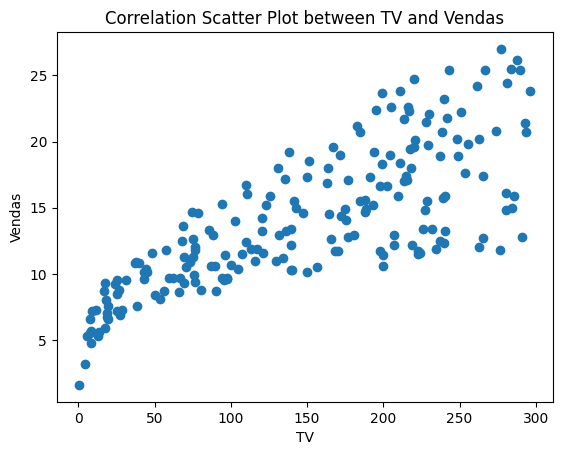

In [ ]:
plt.scatter(x=df['TV'], y=df['Vendas'])
plt.title('Correlation Scatter Plot between TV and Vendas')
plt.xlabel('TV')
plt.ylabel('Vendas')
plt.show()

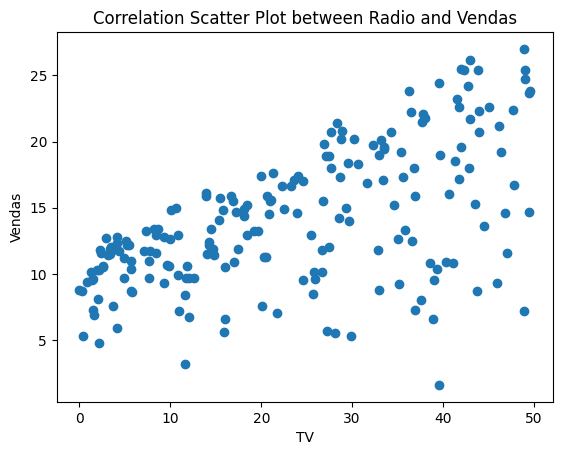

In [ ]:
plt.scatter(x=df['Radio'], y=df['Vendas'])
plt.title('Correlation Scatter Plot between Radio and Vendas')
plt.xlabel('TV')
plt.ylabel('Vendas')
plt.show()

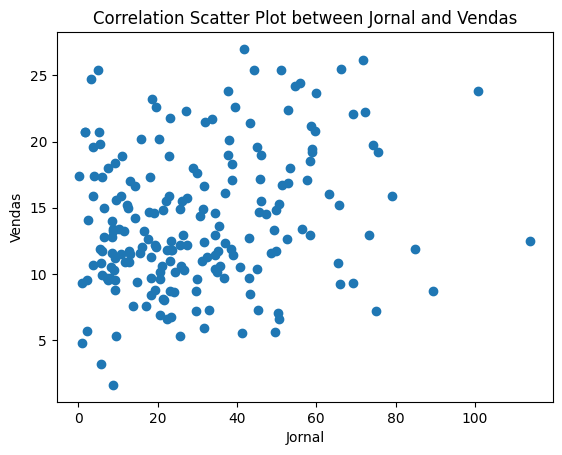

In [ ]:
plt.scatter(x=df['Jornal'], y=df['Vendas'])
plt.title('Correlation Scatter Plot between Jornal and Vendas')
plt.xlabel('Jornal')
plt.ylabel('Vendas')
plt.show()

### Model TV x Vendas

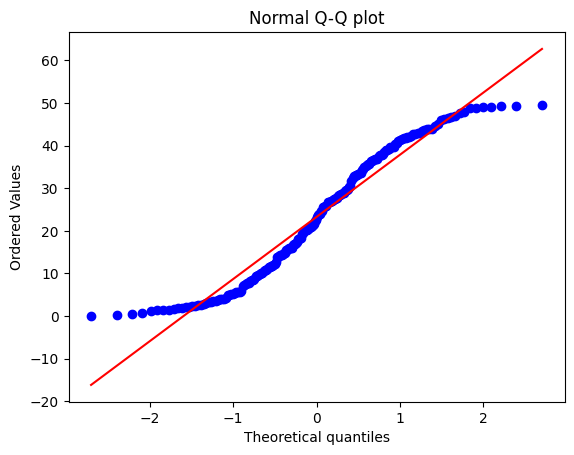

In [ ]:
stats.probplot(df['Radio'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

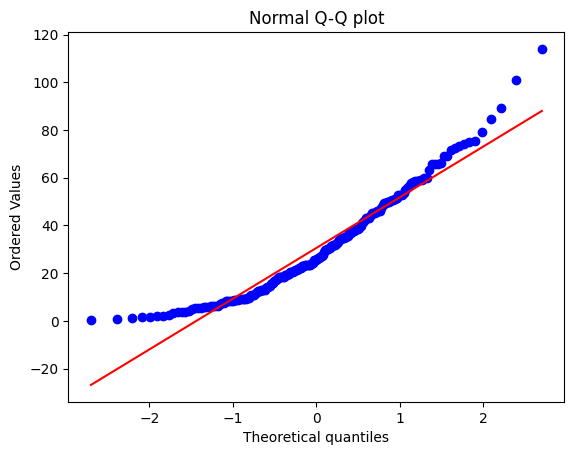

In [ ]:
stats.probplot(df['Jornal'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

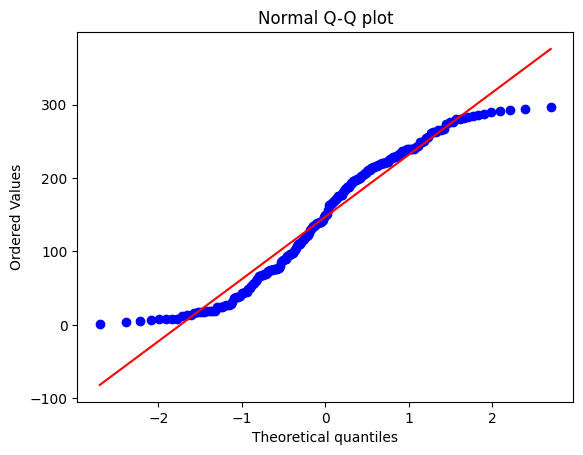

In [ ]:
stats.probplot(df['TV'], dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

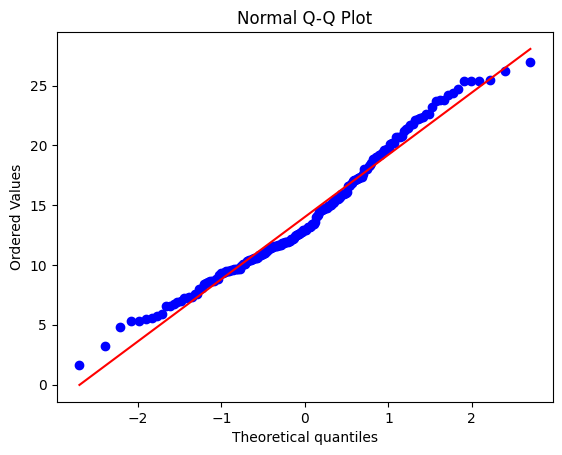

In [ ]:
stats.probplot(df['Vendas'], dist='norm', plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

Test Shapiro-Wilk

Ho = normal distribution: p > 0.05

Ha = not normal distribution: p <= 0.05

In [ ]:
statistics, p = stats.shapiro(df['Vendas'])
print('Test statistics: {}'.format(statistics))
print('p-value: {}'.format(p))

Test statistics: 0.9760257005691528
p-value: 0.001682588830590248


In [ ]:
statistics, p = stats.shapiro(df['Jornal'])
print('Test statistics: {}'.format(statistics))
print('p-value: {}'.format(p))

Test statistics: 0.9363999962806702
p-value: 1.1272206990042832e-07


In [ ]:
statistics, p = stats.shapiro(df['Radio'])
print('Test statistics: {}'.format(statistics))
print('p-value: {}'.format(p))

Test statistics: 0.9440046548843384
p-value: 5.196915822125447e-07


In [ ]:
statistics, p = stats.shapiro(df['TV'])
print('Test statistics: {}'.format(statistics))
print('p-value: {}'.format(p))

Test statistics: 0.9495095014572144
p-value: 1.692740511316515e-06


### Linear Correlation

Pearson (normal distribution)

Spearman (not normal distribution)

Kendall (not normal distribution with few samples)

Ho = no linear correlation: p > 0.05

Ha = there is linear correlation: p <= 0.05


In [ ]:
coef, p = stats.kendalltau(df['TV'], df['Vendas'])
print('Correlation coeficient: {}'.format(coef))
print('p-valor: {}'.format(p))

Correlation coeficient: 0.6219463551009411
p-valor: 7.134710358862362e-39


### Linear Regression Models

In [ ]:
regression_tv_vendas = smf.ols('Vendas ~ TV', data = df).fit()
regression_radio_vendas = smf.ols('Vendas ~ Radio', data=df).fit()
regression_jornal_vendas = smf.ols('Vendas ~ Jornal', data=df).fit()

In [ ]:
residues_tv = regression_tv_vendas.resid
residues_tv

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
         ...   
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: float64

In [ ]:
residues_radio = regression_radio_vendas.resid
residues_radio

0      5.134021
1     -6.869722
2     -9.306195
3      0.825286
4      1.401407
         ...   
195   -2.460872
196   -0.603867
197    1.605151
198    7.683539
199    2.346898
Length: 200, dtype: float64

In [ ]:
residues_jornal = regression_jornal_vendas.resid
residues_jornal

0      5.963831
1     -4.418066
2     -6.841639
3      2.949047
4     -2.645484
         ...   
195   -5.506172
196   -3.094421
197    0.098557
198    9.527910
199    0.572763
Length: 200, dtype: float64

## 1st Assumption - Residues normality test

Ho = normal distribution: p > 0.05

Ha = not normal distribution: p <= 0.05

In [ ]:
statistics, p = stats.shapiro(residues_tv)
print('Test Statistics: {}'.format(statistics))
print('p-valor: {}'.format(p))

Test Statistics: 0.9905304908752441
p-valor: 0.21331307291984558


In [ ]:
statistics, p = stats.shapiro(residues_radio)
print('Test Statistics: {}'.format(statistics))
print('p-valor: {}'.format(p))

Test Statistics: 0.9607170820236206
p-valor: 2.366568696743343e-05


In [ ]:
statistics, p = stats.shapiro(residues_jornal)
print('Test Statistics: {}'.format(statistics))
print('p-valor: {}'.format(p))

Test Statistics: 0.9819672703742981
p-valor: 0.011393697932362556


### 2nd Assumption: Residues Homocedasticity analysis

The data are homecedastic when there is constant variation

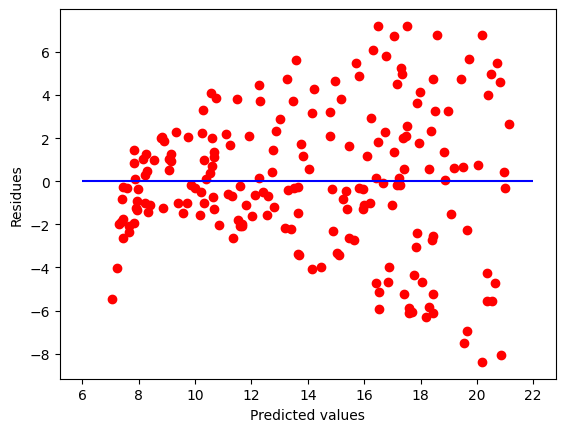

In [ ]:
plt.scatter(y=residues_tv, x=regression_tv_vendas.predict(), color='red')
plt.hlines(y=0, xmin=6, xmax=22, color='blue')
plt.ylabel('Residues')
plt.xlabel('Predicted values')
plt.show()

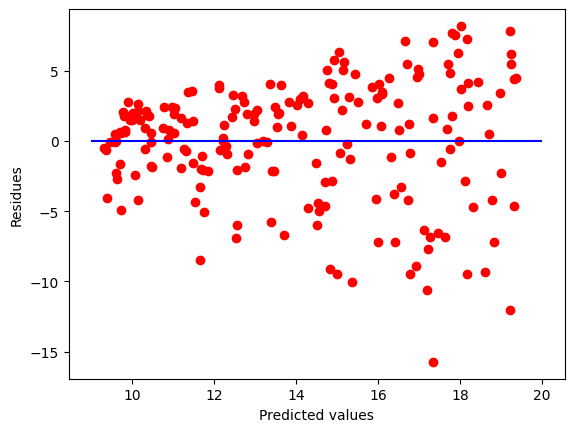

In [ ]:
plt.scatter(y=residues_radio, x=regression_radio_vendas.predict(), color='red')
plt.hlines(y=0, xmin=9, xmax=20, color='blue')
plt.ylabel('Residues')
plt.xlabel('Predicted values')
plt.show()

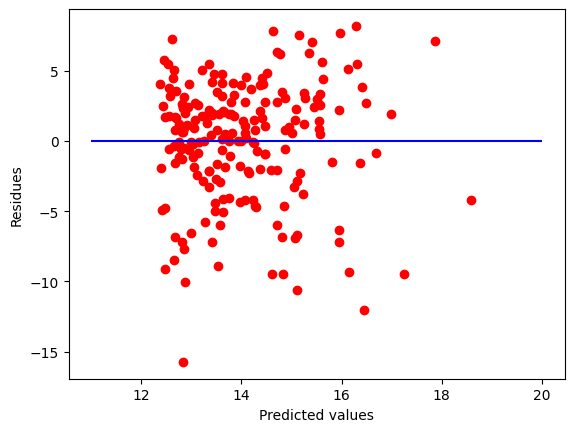

In [ ]:
plt.scatter(y=residues_radio, x=regression_jornal_vendas.predict(), color='red')
plt.hlines(y=0, xmin=11, xmax=20, color='blue')
plt.ylabel('Residues')
plt.xlabel('Predicted values')
plt.show()

Test Breusch-Pagan (Homocedasticity or heterocedasticity)

Ho = there is homecedasticity: p > 0.05

Ha = there is no homocedasticity: p <= 0.05

In [ ]:
statistics, p , f, fp = sms.het_breuschpagan(regression_tv_vendas.resid, regression_tv_vendas.model.exog)
print('Test statistics: {}'.format(statistics))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Test statistics: 48.037965662293615
p-valor: 4.1804559077556965e-12
f-valor: 62.591404771514306
f_p-valor: 1.7618451425695673e-13


In [ ]:
statistics, p , f, fp = sms.het_breuschpagan(regression_radio_vendas.resid, regression_radio_vendas.model.exog)
print('Test statistics: {}'.format(statistics))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Test statistics: 36.6458051740195
p-valor: 1.4166353247318137e-09
f-valor: 44.41801713255949
f_p-valor: 2.572140228519948e-10


In [ ]:
statistics, p , f, fp = sms.het_breuschpagan(regression_jornal_vendas.resid, regression_jornal_vendas.model.exog)
print('Test statistics: {}'.format(statistics))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Test statistics: 2.471728538393525
p-valor: 0.11591039135561061
f-valor: 2.477631414382325
f_p-valor: 0.11707253378080565


**Outiliers in residues**

In outliers test the values should be within -3 and 3

In [ ]:
outliers_tv = regression_tv_vendas.outlier_test()

In [ ]:
outliers_tv.max()

student_resid    2.243400
unadj_p          0.990113
bonf(p)          1.000000
dtype: float64

In [ ]:
outliers_tv.min()

student_resid   -2.633499
unadj_p          0.009122
bonf(p)          1.000000
dtype: float64

In [ ]:
outliers_radio = regression_radio_vendas.outlier_test()

In [ ]:
outliers_radio.max()

student_resid    1.940553
unadj_p          0.999917
bonf(p)          1.000000
dtype: float64

In [ ]:
outliers_radio.min()

student_resid   -3.825537
unadj_p          0.000175
bonf(p)          0.035019
dtype: float64

In [ ]:
outliers_jornal = regression_jornal_vendas.outlier_test()

In [ ]:
outliers_jornal.max()

student_resid    2.558821
unadj_p          0.997443
bonf(p)          1.000000
dtype: float64

In [ ]:
outliers_radio.min()

student_resid   -3.825537
unadj_p          0.000175
bonf(p)          0.035019
dtype: float64

### Linear Regression

In [ ]:
print(regression_tv_vendas.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.47e-42
Time:                        15:47:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [ ]:
print(regression_radio_vendas.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           4.35e-19
Time:                        15:47:20   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

In [ ]:
print(regression_jornal_vendas.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sat, 02 Dec 2023   Prob (F-statistic):            0.00115
Time:                        15:47:21   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

#### Statistic t:

Ho = coeficient equal zero: p > 0.05 (coeficient not validated)

Ha = coeficient different than zero: p <= 0.05 (coeficient validated)

### Equation: Vendas = Intercept + Advertisment*coef

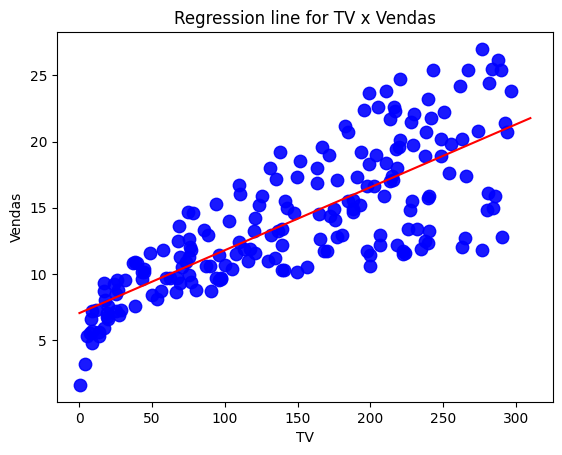

In [ ]:
plt.scatter(y=df['Vendas'], x=df['TV'], color='blue', s=80, alpha=0.9)
X_plot = np.linspace(0, 310)
plt.plot(X_plot, X_plot*regression_tv_vendas.params[1] + regression_tv_vendas.params[0], color='r')
plt.title('Regression line for TV x Vendas')
plt.ylabel('Vendas')
plt.xlabel('TV')
plt.show()

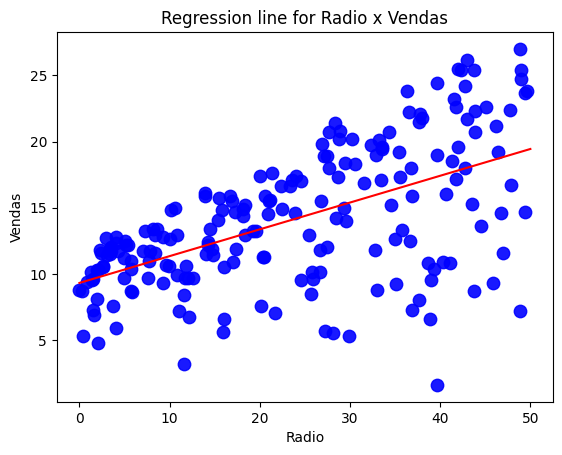

In [ ]:
plt.scatter(y=df['Vendas'], x=df['Radio'], color='blue', s=80, alpha=0.9)
X_plot = np.linspace(0, 50)
plt.plot(X_plot, X_plot*regression_radio_vendas.params[1] + regression_radio_vendas.params[0], color='r')
plt.title('Regression line for Radio x Vendas')
plt.ylabel('Vendas')
plt.xlabel('Radio')
plt.show()

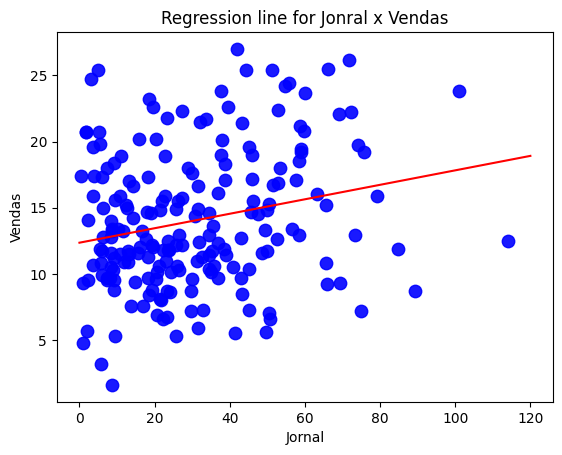

In [ ]:
plt.scatter(y=df['Vendas'], x=df['Jornal'], color='blue', s=80, alpha=0.9)
X_plot = np.linspace(0, 120)
plt.plot(X_plot, X_plot*regression_jornal_vendas.params[1] + regression_jornal_vendas.params[0], color='r')
plt.title('Regression line for Jonral x Vendas')
plt.ylabel('Vendas')
plt.xlabel('Jornal')
plt.show()

In [ ]:
results = pd.DataFrame()

In [ ]:
results_tv = {
    'Model': 'regression_tv_vendas',
    'MAE': np.mean(np.abs(df['Vendas'] - regression_tv_vendas.predict())),
    'MSE': np.mean(np.abs(df['Vendas'] - regression_tv_vendas.predict()) ** 2),
    'AIC': regression_tv_vendas.aic,
    'BIC': regression_tv_vendas.bic,
    'R^2': regression_tv_vendas.rsquared
}

results = pd.concat([results, pd.DataFrame(results_tv, index=[0])], ignore_index=True)

In [ ]:
results_radio = {
    'Model': 'regression_radio_vendas',
    'MAE': np.mean(np.abs(df['Vendas'] - regression_radio_vendas.predict())),
    'MSE': np.mean(np.abs(df['Vendas'] - regression_radio_vendas.predict()) ** 2),
    'AIC': regression_radio_vendas.aic,
    'BIC': regression_radio_vendas.bic,
    'R^2': regression_radio_vendas.rsquared
}

results = pd.concat([results, pd.DataFrame(results_radio, index=[0])], ignore_index=True)

In [ ]:
results_jornal = {
    'Model': 'regression_jornal_vendas',
    'MAE': np.mean(np.abs(df['Vendas'] - regression_jornal_vendas.predict())),
    'MSE': np.mean(np.abs(df['Vendas'] - regression_jornal_vendas.predict()) ** 2),
    'AIC': regression_jornal_vendas.aic,
    'BIC': regression_jornal_vendas.bic,
    'R^2': regression_jornal_vendas.rsquared
}

results = pd.concat([results, pd.DataFrame(results_jornal, index=[0])], ignore_index=True)

In [ ]:
results

,Model,MAE,MSE,AIC,BIC,R^2
0,regression_tv_vendas,2.549806,10.512653,1042.091328,1048.687962,0.611875
1,regression_radio_vendas,3.320219,18.092398,1150.673780,1157.270415,0.332032
2,regression_jornal_vendas,4.146560,25.674023,1220.671352,1227.267986,0.052120
